/tmp/ipykernel_636404/1498966066.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_per_score = category_counts.groupby('score_range').apply(


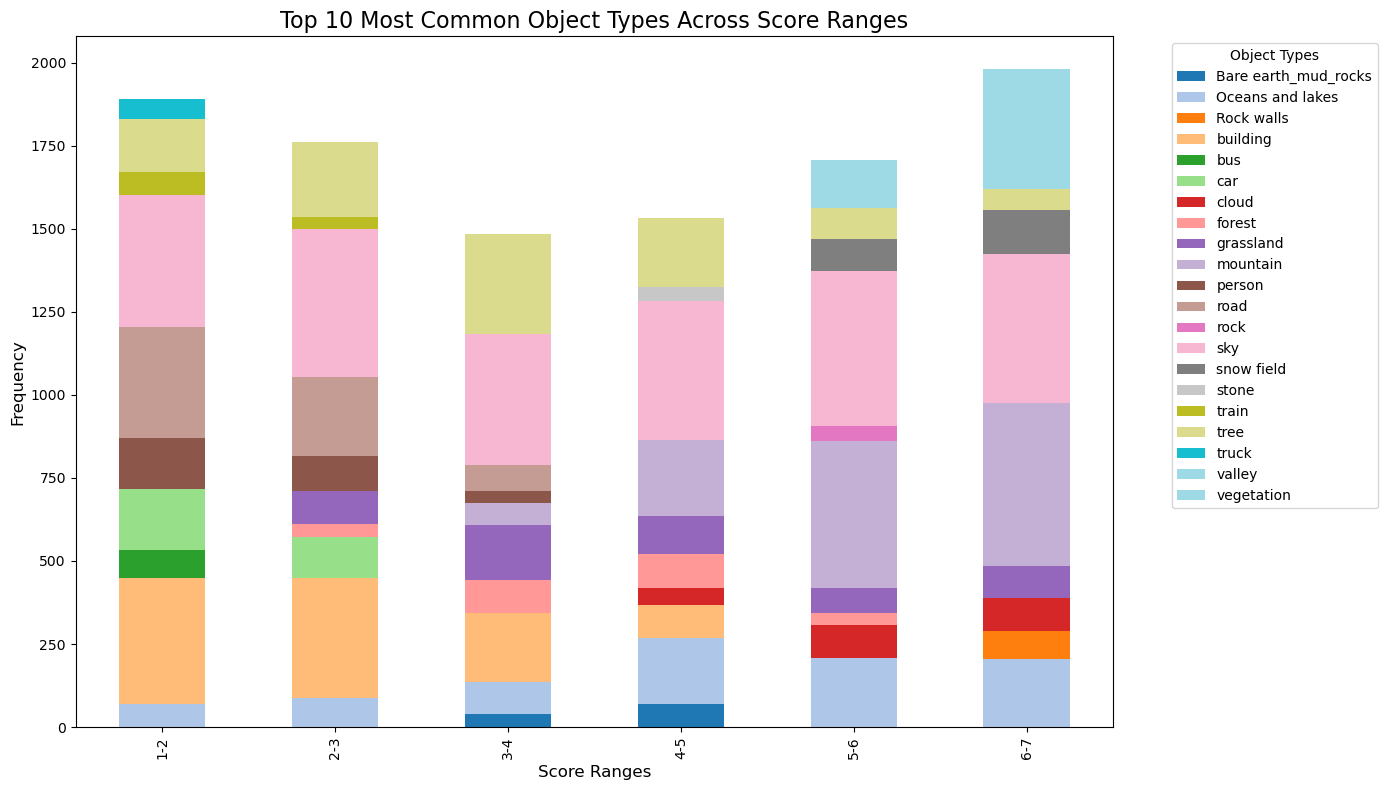

Image has been saved to: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/object_types_across_score_ranges.png


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 设置路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

# CSV 文件列表
csv_files = [
    'selected_images_1_to_2.csv',
    'selected_images_2_to_3.csv',
    'selected_images_3_to_4.csv',
    'selected_images_4_to_5.csv',
    'selected_images_5_to_6.csv',
    'selected_images_6_to_7.csv'
]

# 合并所有数据
all_data = pd.DataFrame()

for file in csv_files:
    file_path = project_base_path / 'data' / 'processed' / 'landscape_ob' / file
    # 提取分数范围
    score_range = file.split('_')[2] + '-' + file.split('_')[4].split('.')[0]
    temp_data = pd.read_csv(file_path)
    temp_data['score_range'] = score_range
    all_data = pd.concat([all_data, temp_data], ignore_index=True)

# 处理 object_type 列：确保所有非字符串数据转换为空字符串，再分隔并去除空格
all_data['object_types'] = all_data['object_type'].fillna('').astype(str).str.split(';').apply(lambda x: [i.strip() for i in x])

# 展开 object types 列
expanded_data = all_data.explode('object_types')

# 计算每个评分范围中最常见的前6个物体类型
category_counts = expanded_data.groupby(['score_range', 'object_types']).size().reset_index(name='frequency')
top_categories_per_score = category_counts.groupby('score_range').apply(
    lambda x: x.nlargest(10, 'frequency')).reset_index(drop=True)

# 创建透视表，以评分范围为列，物体类型为索引，频率为值
pivot_data = top_categories_per_score.pivot(index='score_range', columns='object_types', values='frequency').fillna(0)

# 绘制图表
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

plt.title('Top 10 Most Common Object Types Across Score Ranges', fontsize=16)
plt.xlabel('Score Ranges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend(title='Object Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# 保存图片
output_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_types_across_score_ranges.png'
plt.savefig(output_file, dpi=300)

# 显示图表
plt.show()

print(f"Image has been saved to: {output_file}")


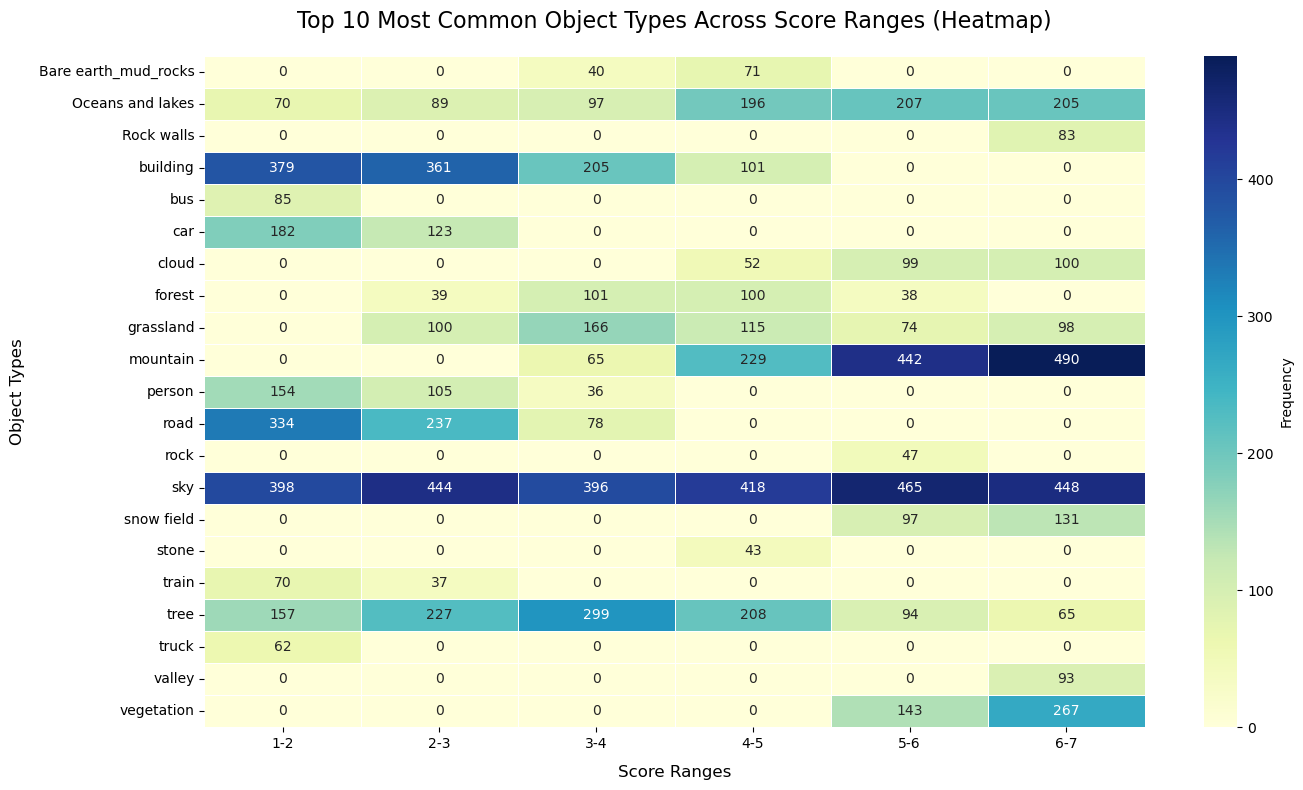

Heatmap image has been saved to: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/object_types_heatmap_across_score_ranges_transposed.png


In [7]:
# 第二个 cell: 生成热图（对象类型在纵轴，评分范围在横轴）
import seaborn as sns
import matplotlib.pyplot as plt

# 转置数据框，使得 object types 在 y 轴，score ranges 在 x 轴
pivot_data_transposed = pivot_data.T

# 设置绘图大小
plt.figure(figsize=(14, 8))

# 使用热图，增加颜色对比度和格式
sns.heatmap(
    pivot_data_transposed, 
    cmap='YlGnBu',          # 类似目标图的颜色
    annot=True,             # 在每个单元格中显示频率值
    fmt=".0f",              # 不显示小数
    linewidths=0.5,         # 单元格线条宽度
    cbar_kws={'label': 'Frequency'}  # 设置色条标签
)

# 设置标题和标签
plt.title('Top 10 Most Common Object Types Across Score Ranges (Heatmap)', fontsize=16, pad=20)
plt.xlabel('Score Ranges', fontsize=12, labelpad=10)
plt.ylabel('Object Types', fontsize=12, labelpad=10)

# 调整布局
plt.tight_layout()

# 保存图像
output_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_types_heatmap_across_score_ranges_transposed.png'
plt.savefig(output_file, dpi=300)

# 显示图像
plt.show()

print(f"Heatmap image has been saved to: {output_file}")


In [3]:
import pandas as pd
from pathlib import Path

# 设置路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

# CSV 文件列表
csv_files = [
    'selected_images_1_to_2.csv',
    'selected_images_2_to_3.csv',
    'selected_images_3_to_4.csv',
    'selected_images_4_to_5.csv',
    'selected_images_5_to_6.csv',
    'selected_images_6_to_7.csv'
]

# 合并所有数据
all_data = pd.DataFrame()

for file in csv_files:
    file_path = project_base_path / 'data' / 'processed' / 'landscape_ob' / file
    # 提取分数范围
    score_range = file.split('_')[2] + '-' + file.split('_')[4].split('.')[0]
    temp_data = pd.read_csv(file_path)
    temp_data['score_range'] = score_range
    all_data = pd.concat([all_data, temp_data], ignore_index=True)

# 处理 object_type 列：确保所有非字符串数据转换为空字符串，再分隔并去除空格
all_data['object_types'] = all_data['object_type'].fillna('').astype(str).str.split(';').apply(lambda x: [i.strip() for i in x])

# 展开 object types 列
expanded_data = all_data.explode('object_types')

# 计算每个分数区间中各个物体类型的数量
category_counts = expanded_data.groupby(['score_range', 'object_types']).size().reset_index(name='count')

# 按 score_range 和 count 排序，每个分数区间内从大到小排序
category_counts = category_counts.sort_values(['score_range', 'count'], ascending=[True, False])

# 保存结果到 CSV 文件
output_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_type_counts_sorted_by_score_range3.csv'
category_counts.to_csv(output_file, index=False)

print(f"Object type counts by score range saved to: {output_file}")


Object type counts by score range saved to: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/object_type_counts_sorted_by_score_range3.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 设定文件路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

file_path = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_type_counts_sorted_by_score_range3.csv'


# 读取数据
data = pd.read_csv(file_path)

# 确保数据中包含了必要的列名
# 确认包含 'score_range', 'object_types', 'count' 三列
if set(['score_range', 'object_types', 'count']).issubset(data.columns):

    # 获取每个评分范围中最常见的前10个物体类型
    top_objects_per_score = data.groupby('score_range').apply(
        lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

    # 创建透视表，以评分范围为列，物体类型为索引，频率为值
    pivot_data = top_objects_per_score.pivot(index='object_types', columns='score_range', values='count').fillna(0)

    # 绘制图表
    plt.figure(figsize=(14, 8))
    pivot_data.plot(kind='bar', stacked=True, colormap='tab20', ax=plt.gca())

    # 设置图表标题和标签
    plt.title('Top 10 Most Common Object Types Across Score Ranges', fontsize=16)
    plt.xlabel('Object Types', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # 调整图例位置
    plt.legend(title='Score Range', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # 保存图表图片
    output_file = Path.cwd().parent / 'data' / 'processed' / 'landscape_ob' / 'object_types_across_score_ranges.png'
    plt.savefig(output_file, dpi=300)

    # 显示图表
    plt.show()

    print(f"图表已保存至: {output_file}")

else:
    print("数据文件缺少必要的列：'score_range', 'object_types', 'count'")


/tmp/ipykernel_636404/2531761781.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_objects_per_score = data.groupby('score_range').apply(


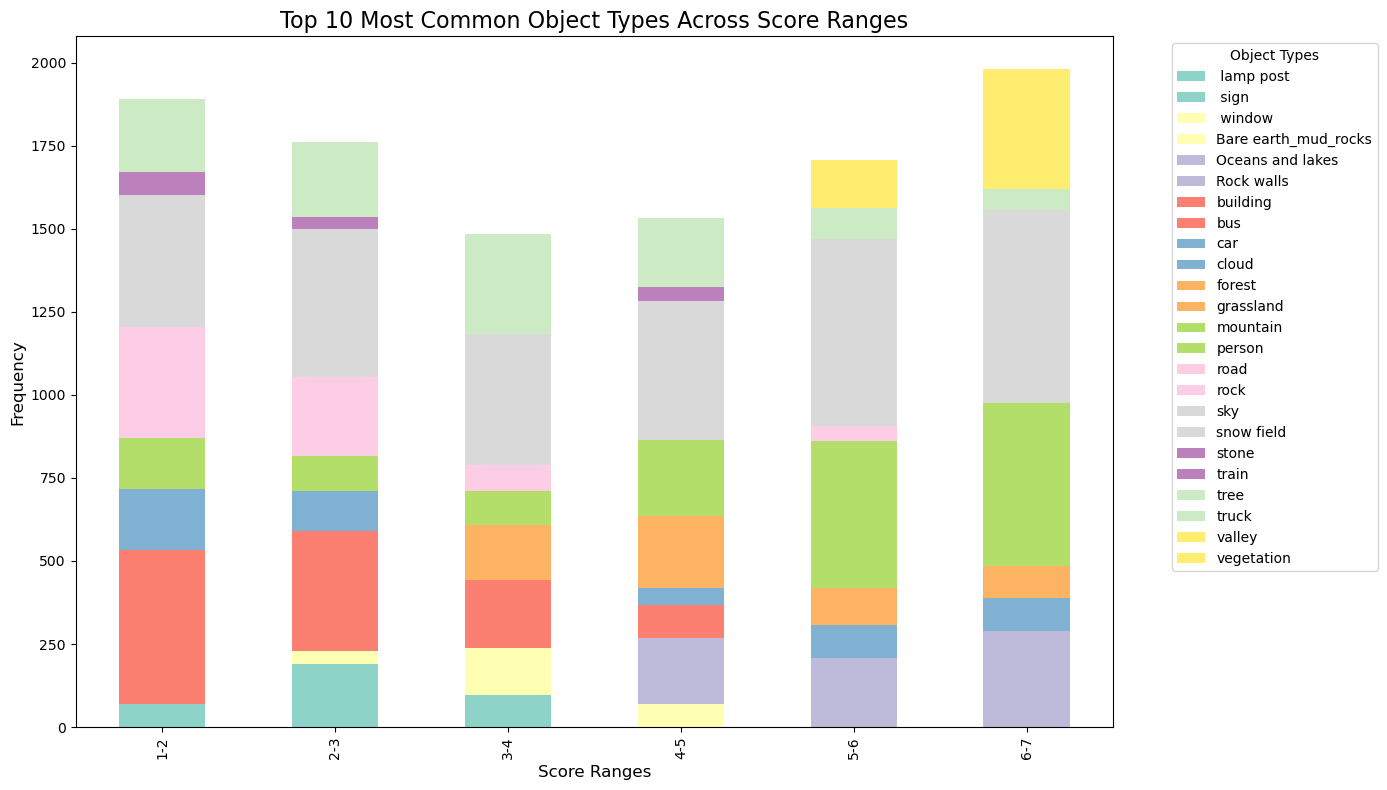

图表已保存至: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/object_types_across_score_ranges.png


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# 设定文件路径
file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

file_path = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_type_counts_sorted_by_score_range3.csv'

# 读取数据
data = pd.read_csv(file_path)

# 确保数据中包含了必要的列
if set(['score_range', 'object_types', 'count']).issubset(data.columns):

    # 获取每个评分范围中最常见的前10个物体类型
    top_objects_per_score = data.groupby('score_range').apply(
        lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

    # 创建透视表，以评分范围为列，物体类型为索引，频率为值
    pivot_data = top_objects_per_score.pivot(index='score_range', columns='object_types', values='count').fillna(0)

    # 绘制图表（堆叠柱状图，以score_range为X轴）
    plt.figure(figsize=(14, 8))
    
    # 使用色盲友好的调色板 Set3
    pivot_data.plot(kind='bar', stacked=True, colormap='Set3', ax=plt.gca())

    # 设置图表标题和标签
    plt.title('Top 10 Most Common Object Types Across Score Ranges', fontsize=16)
    plt.xlabel('Score Ranges', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # 调整图例位置
    plt.legend(title='Object Types', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    # 保存图表图片
    output_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_types_across_score_ranges.png'
    output_file.parent.mkdir(parents=True, exist_ok=True)  # 创建目录
    plt.savefig(output_file, dpi=300)  # 保存图表

    # 显示图表
    plt.show()

    print(f"图表已保存至: {output_file}")

else:
    print("数据文件缺少必要的列：'score_range', 'object_types', 'count'")


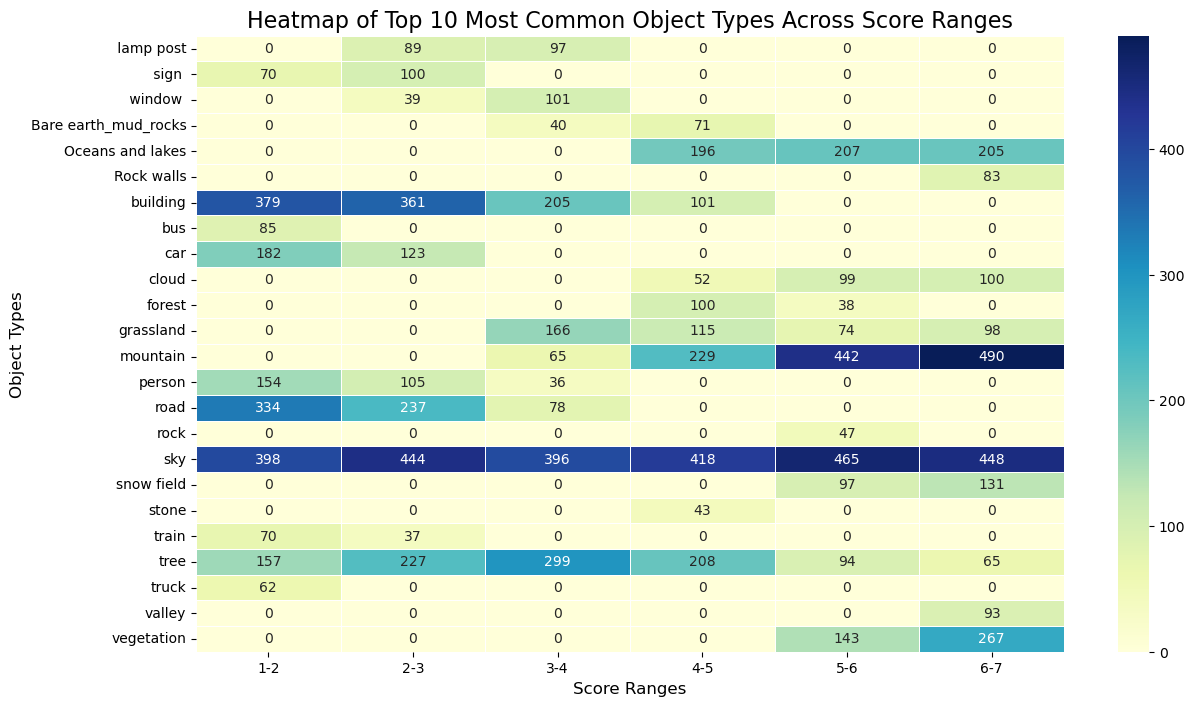

热图已保存至: /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/object_types_across_score_ranges_heatmap_transposed.png


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# 确保前一个代码单元已经成功创建了 pivot_data
try:
    pivot_data
except NameError:
    print("请先运行第一个代码单元以生成 'pivot_data'。")
else:
    # 转置透视表，使得 score_range 为列，object_types 为行
    pivot_data_transposed = pivot_data.T

    # 绘制热图
    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_data_transposed, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)

    # 设置标题和标签
    plt.title('Heatmap of Top 10 Most Common Object Types Across Score Ranges', fontsize=16)
    plt.xlabel('Score Ranges', fontsize=12)
    plt.ylabel('Object Types', fontsize=12)

    # 保存热图图片
    output_file = Path.cwd().parent.parent / 'data' / 'processed' / 'landscape_ob' / 'object_types_across_score_ranges_heatmap_transposed.png'
    output_file.parent.mkdir(parents=True, exist_ok=True)  # 确保目录存在
    plt.savefig(output_file, dpi=300)  # 保存热图

    # 显示热图
    plt.show()

    print(f"热图已保存至: {output_file}")
